In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [2]:
mat = loadmat("../../Downloads/ex7data1.mat")
X = mat["X"]

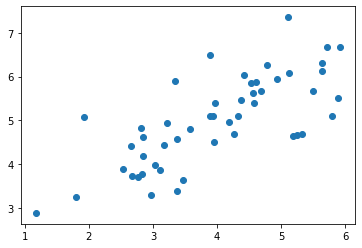

In [3]:
plt.scatter(X[:, 0], X[:, 1])

In [4]:
def featureNormalize(X):
    """
    Returns a normalized version of X where the mean value of each feature is 0 and the standard deviation is 1.
    """
    mu = np.mean(X,axis=0)
    sigma = np.std(X,axis=0)
    
    X_norm = (X - mu)/sigma
    
    return X_norm, mu, sigma

In [5]:
def pca(X):
    m, n = X.shape[0], X.shape[1]
    sigma = (1/m) * X.T @ X
    w, v = LA.eig(sigma)
    U, S, V = svd(sigma)
    return w, v, U, S, V, sigma

In [6]:
from numpy.linalg import svd
X_norm, mu, sigma = featureNormalize(X)
w, v, U, S, V, sigma = pca(X_norm)

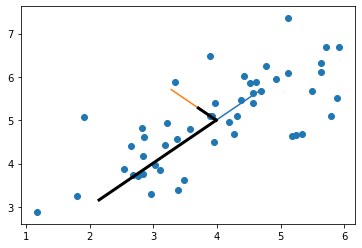

In [7]:
plt.plot([mu[0], mu[0]+ v[0][0]], [mu[1], mu[1] + v[1][0]])
plt.plot([mu[0], mu[0]+ v[0][1]], [mu[1], mu[1] + v[1][1]])
plt.plot([mu[0],(mu+1.5*S[0]*U[:,0].T)[0]],[mu[1],(mu+1.5*S[0]*U[:,0].T)[1]],color="black",linewidth=3)
plt.plot([mu[0],(mu+1.5*S[1]*U[:,1].T)[0]],[mu[1],(mu+1.5*S[1]*U[:,1].T)[1]],color="black",linewidth=3)

#plt.plot([mu[0], mu[0] + ], [mu[1], mu[1] + 0.6298592])
#plt.plot([mu[0], mu[0] + -0.6298592], [mu[1], mu[1] + -0.77670934])
plt.scatter(X[:, 0], X[:, 1])
#plt.plot(mu[0] + -0.77670934, mu[1] + 0.6298592)

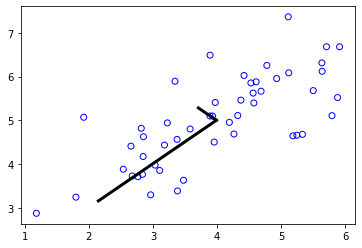

In [8]:
plt.scatter(X[:,0],X[:,1],marker="o",facecolors="none",edgecolors="b")
plt.plot([mu[0],(mu+1.5*S[0]*U[:,0].T)[0]],[mu[1],(mu+1.5*S[0]*U[:,0].T)[1]],color="black",linewidth=3)
plt.plot([mu[0],(mu+1.5*S[1]*U[:,1].T)[0]],[mu[1],(mu+1.5*S[1]*U[:,1].T)[1]],color="black",linewidth=3)

In [9]:
def projectData(X, U, K):
    U_reduce = U[:, :K]
    return X @ U_reduce

In [10]:
K=1
Z = projectData(X_norm, U, K)

In [11]:
Z = Z.reshape((50, 1))

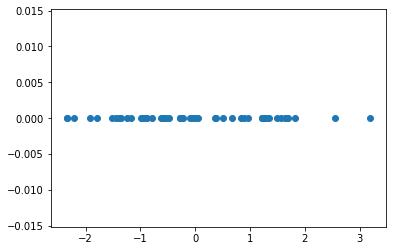

In [12]:
plt.scatter(Z, np.zeros(Z.shape))

In [13]:
def recoverData(Z, U, K):
    U_reduce = U[:, :K]
    return Z @ U_reduce.T

In [14]:
X_approx = recoverData(Z, U, K)

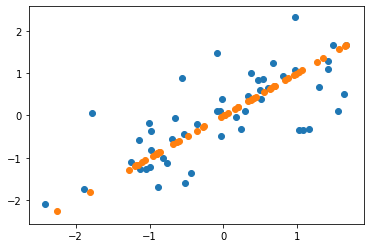

In [15]:
plt.scatter(X_norm[:, 0], X_norm[:, 1])
plt.scatter(X_approx[:, 0], X_approx[:, 1])

In [16]:
data = loadmat('../../Downloads/ex7faces.mat')
X = data['X']
X.shape

(5000, 1024)

In [17]:
import math
def display_data(X):
    '''
    Displays 2D data stored in X in a nice grid.
    '''
    m = X.shape[0] # number of images
    display_rows = math.floor(math.sqrt(m))
    display_cols = math.ceil(m / display_rows)
    n = X.shape[1] # pixels per image
    image_side = int(math.sqrt(n))
    
    plt.figure(figsize=(8,8))
    
    for i in range(m):
        image = X[i]
        image = np.reshape(image, (image_side, image_side), order='F')
        plt.subplot(display_rows, display_cols, i+1)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()

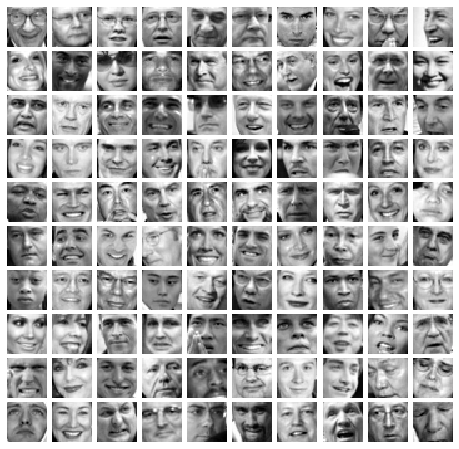

In [18]:
display_data(X[:100])

In [19]:
X_norm, mu, sig = featureNormalize(X)
w, v, U, S, V, sigma = pca(X_norm)

In [20]:
U.shape

(1024, 1024)

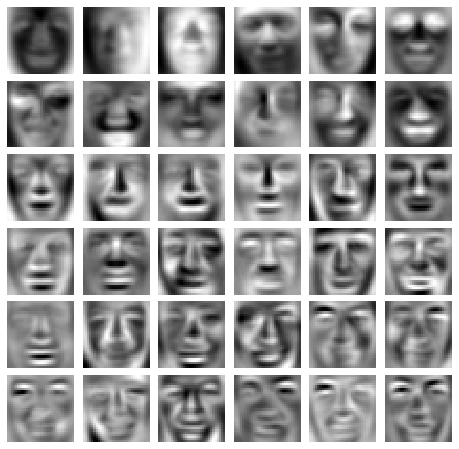

In [21]:
display_data(U[:, :36].T)

In [22]:
K = 100
Z = projectData(X_norm, U, K)

In [23]:
Z.shape

(5000, 100)

In [24]:
X_rec = recoverData(Z, U, K)
X_rec.shape

(5000, 1024)

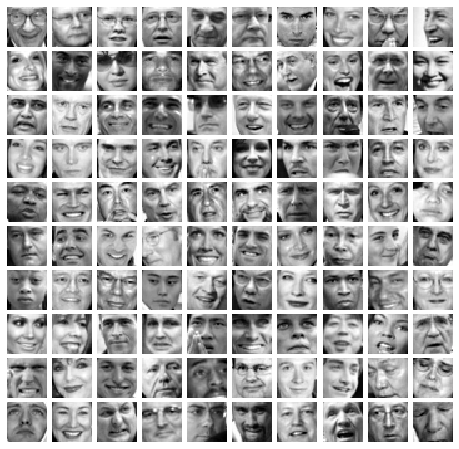

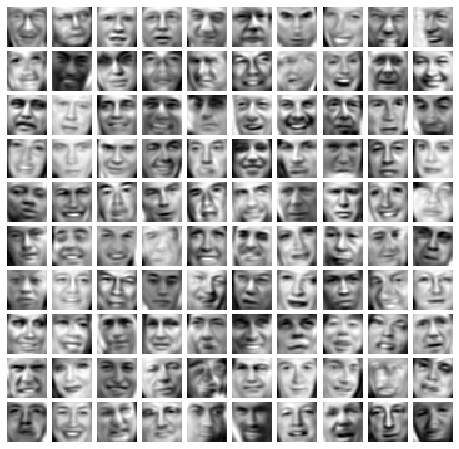

In [25]:
display_data(X[:100])
display_data(X_rec[:100]*sig + mu)

In [26]:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

Text(0.5, 1.0, 'Simple plot')

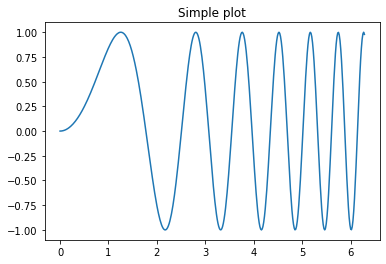

In [27]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')

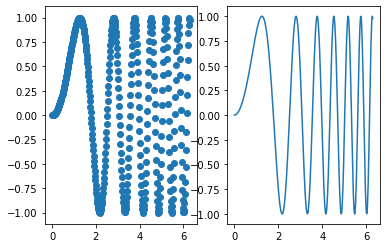

In [28]:
fig, ax = plt.subplots(1, 2)
ax[1].plot(x, y)
ax[0].scatter(x, y)

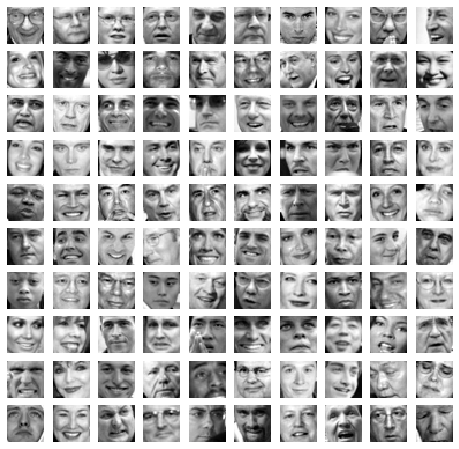

In [29]:
fig, ax = plt.subplots(nrows=10,ncols=10,figsize=(8,8))
for i in range(0,100,10):
    for j in range(10):
        ax[int(i/10),j].imshow(X[i+j,:].reshape((32,32),order="F"),cmap="gray")
        ax[int(i/10),j].axis("off")

In [30]:
test_img = X_norm[25]

In [31]:
Z_test = test_img @ U[:, :100]
X_rec_test = Z_test @ U[:, :100].T

In [32]:
index =  np.argmin(np.linalg.norm(Z_test - Z, axis=1))
index

25